This the script for measuring the attenuator over 0-6GHz

In [1]:
import numpy as np
import pocketvna
import os
import matplotlib.pyplot as plt

Could not load "PocketVnaApi_x64" by systempath. Trying another one "C:\Users\Jacco\Documents\GitHub\bep-jacco-van-leenen\Code\PocketVnaApi_x64.dll"


## VNA

In [2]:
# Connecting the VNA
driver = pocketvna.Driver()

print('Driver is created: {} devices connected..'.format(driver.count()))
for i in range(0, driver.count()):
    print('Device {}'.format(i))
    print('\t {}'.format(driver.info_at(i)))

if not driver.connect_to(0):
    print('Failed to connect')

Driver is created: 1 devices connected..
Device 0
	 {'index': 0, 'path:': b'\\\\?\\hid#vid_03eb&pid_2402#7&1fc8f206&0&0000#{4d1e55b2-f16f-11cf-88cb-001111000030}', 'version': 512, 'SN': '12xxxEF', 'product': '', 'vendor': 'Martin', 'read': True, 'write': True}


## Measurement Folder

In [3]:
# Setting the folder where the measurement data will be stored

# Main folder
measurement_folder_name = "Measurements_8"

# Checking if the folder exists. If it doesn't it will create the folder
if not os.path.exists(measurement_folder_name):
    os.mkdir(measurement_folder_name)

## Measurement

In [30]:
#------------------------------------------Measurements--------------------------------------------

def data_saving(s21, name, i):
    file_name ="{}_0-6GHz_attenuator_setting-{}.dat".format(name, i)
    save_name = os.path.join("Measurements_8", file_name)
    data = np.column_stack((s21.real, s21.imag))
    np.savetxt(save_name, data)
    print("Saved: " + save_name)

def calibrating(s21):
    # Setting the file name of the calibration open calibration data
    file_name = "cal-s21_open_0-6GHz_600-steps.dat"
    # Setting the path where the file can be found
#     save_name = os.path.join("Calibration_5", file_name)
    # Load the data
    cal_open = np.loadtxt(file_name)
    # Get the data and put the real and imaginary part together again
    t_open = cal_open[:, 0] + cal_open[:, 1] * 1j
    
    # Setting the file name of the calibration open calibration data
    file_name = "cal-s21_through_0-6GHz_600-steps.dat"
    # Setting the path where the file can be found
#     save_name = os.path.join("Calibration_5", file_name)
    # Load the data
    cal_through = np.loadtxt(file_name)
    # Get the data and put the real and imaginary part together again
    t_through = cal_through[:, 0] + cal_through[:, 1] * 1j
        
    
    return (s21 - t_open) / (t_through - t_open)

#---------------------------------------------Setup------------------------------------------------

steps = 600
freq = np.linspace(10000000, 6000000000, steps, dtype=np.uint64)
average = 10


#------------------------------------------Measurement--------------------------------------------

for i in range(10, 21):
    input("Set the attenuator to {}".format(i))
    s11, s21, s12, s22 = driver.scan(freq, average, pocketvna.NetworkParams.S21)

    data_saving(s21, "s21", i)
    cal = calibrating(s21)
    data_saving(cal, "s21-cal", i)

Set the attenuator to 10
Saved: Measurements_8\s21_0-6GHz_attenuator_setting-10.dat
Saved: Measurements_8\s21-cal_0-6GHz_attenuator_setting-10.dat
Set the attenuator to 11
Saved: Measurements_8\s21_0-6GHz_attenuator_setting-11.dat
Saved: Measurements_8\s21-cal_0-6GHz_attenuator_setting-11.dat
Set the attenuator to 12
Saved: Measurements_8\s21_0-6GHz_attenuator_setting-12.dat
Saved: Measurements_8\s21-cal_0-6GHz_attenuator_setting-12.dat
Set the attenuator to 13
Saved: Measurements_8\s21_0-6GHz_attenuator_setting-13.dat
Saved: Measurements_8\s21-cal_0-6GHz_attenuator_setting-13.dat
Set the attenuator to 14
Saved: Measurements_8\s21_0-6GHz_attenuator_setting-14.dat
Saved: Measurements_8\s21-cal_0-6GHz_attenuator_setting-14.dat
Set the attenuator to 15
Saved: Measurements_8\s21_0-6GHz_attenuator_setting-15.dat
Saved: Measurements_8\s21-cal_0-6GHz_attenuator_setting-15.dat
Set the attenuator to 16
Saved: Measurements_8\s21_0-6GHz_attenuator_setting-16.dat
Saved: Measurements_8\s21-cal_0-6G

## Plotting

Text(0.5, 1.0, '4.2GHz attenuator amplitudes')

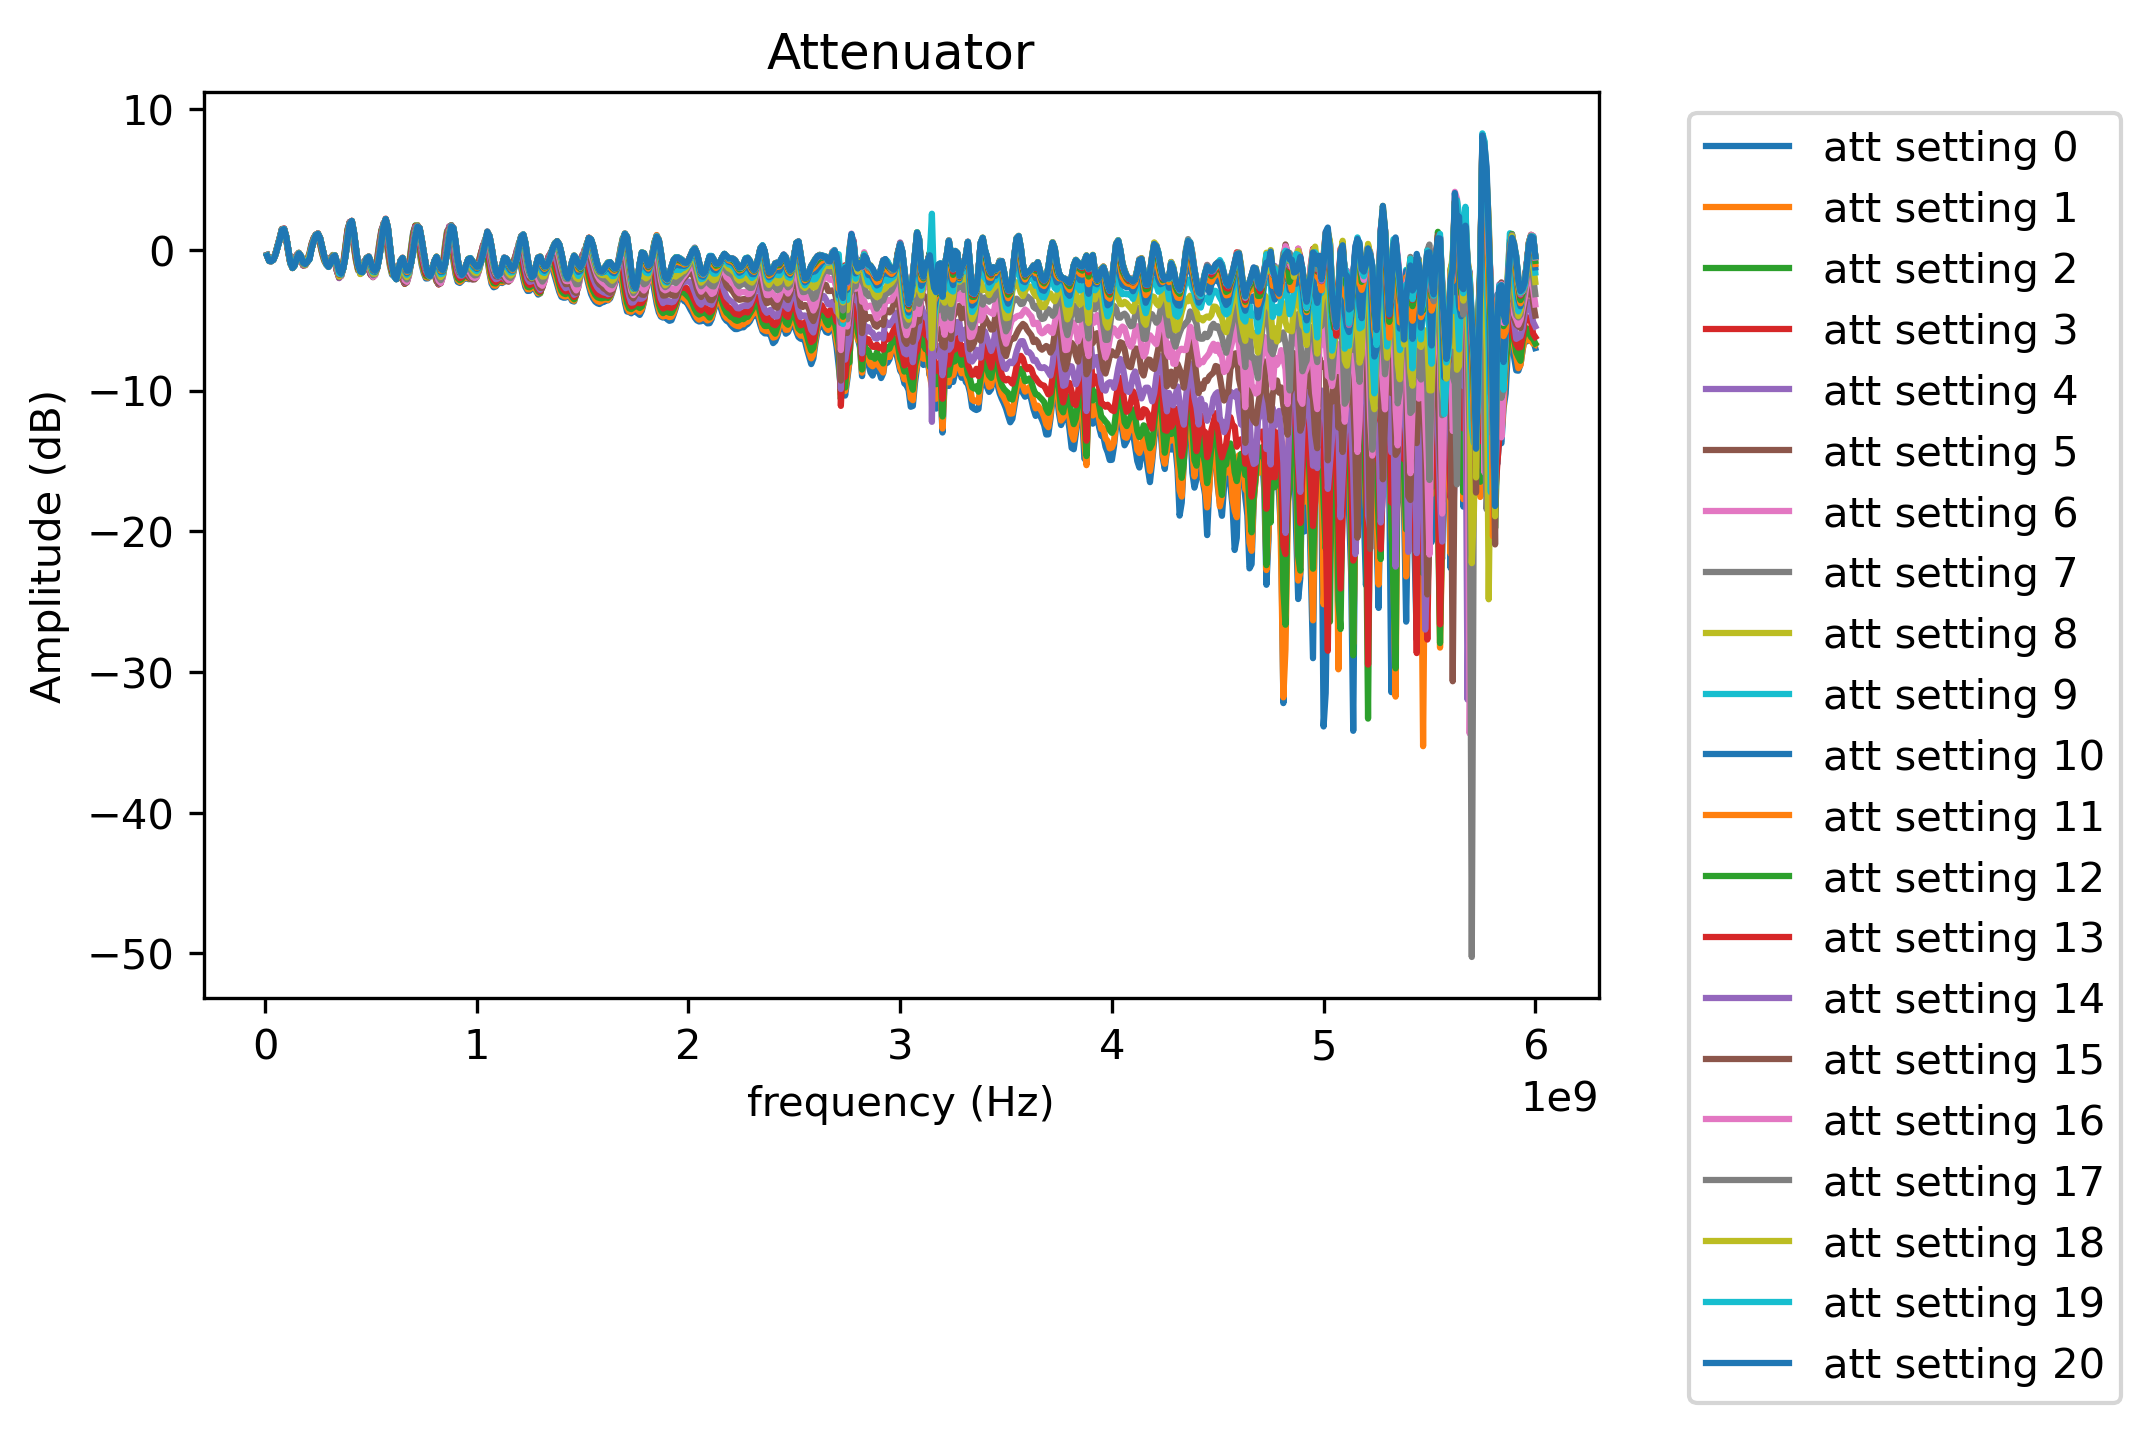

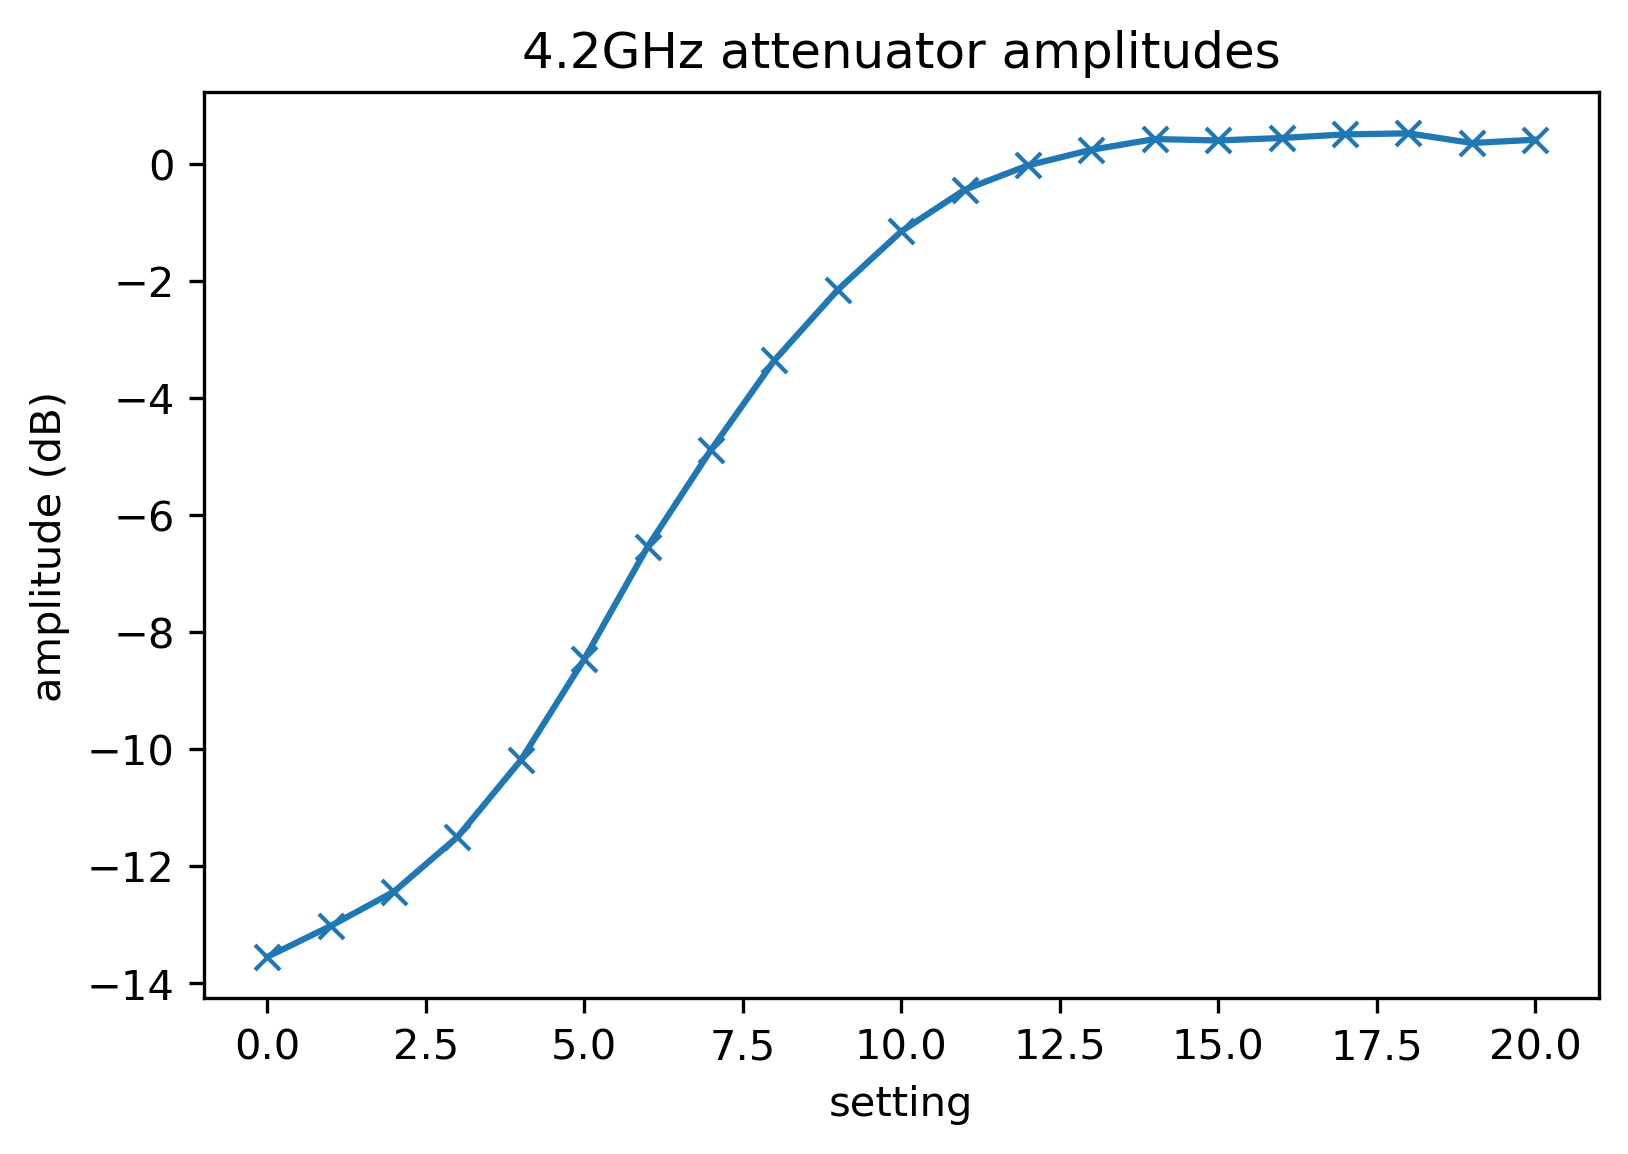

In [40]:
def opening_data(name, i):
    # Setting the file name of the calibration open calibration data
    file_name = "{}_0-6GHz_attenuator_setting-{}.dat".format(name, i)
    # Setting the path where the file can be found
    save_name = os.path.join("Measurements_8", file_name)
    # Load the data
    temp = np.loadtxt(save_name)
    # Get the data and put the real and imaginary part together again
    return temp[:, 0] + temp[:, 1] * 1j
    
    
def make_labels(phase_dif):
    temp = []
    for dif in phase_dif:
        temp.append("$\phi_1 - \phi_2 = ${} degrees".format(dif))
    return temp
    
def plot_phasor(s21, freq):
#     fig = plt.figure(1)
    fig = plt.figure(1)

    plt.plot(s21.real, s21.imag, '-x')
    plt.grid()
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.title("Phasor")
    plt.legend(phase_dif)
    
def plot_amplitude(s21, freq, leg):
    
    amp = np.sqrt(s21.real**2 + s21.imag**2)
    amp = 20*np.log10(amp)
    
    plt.figure(2)
    plt.plot(freq, amp, '-')
    plt.xlabel("frequency (Hz)")
    plt.ylabel("Amplitude (dB)")
    plt.title("Attenuator")
    plt.legend(leg, bbox_to_anchor=(1.05, 1), loc='upper left')
    
def plot_phase(s21, phase, phase_dif):
    arg = 180 * np.arctan2(s21.imag, s21.real)/np.pi
    
    plt.figure(3)
    plt.plot(phase, arg, 'x')
    plt.xlabel("phase (degrees)")
    plt.ylabel("Amplitude")
    plt.title("Attenuator")
    plt.legend(phase_dif)
    
steps = 600    
freq = np.linspace(10000000, 6000000000, 600, dtype=np.uint64)

plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 300

leg = []
vector = []

for i in range(0, 21, 1):
    leg.append("att setting {}".format(i))
    s21_cal = opening_data("s21-cal", i)
    vector.append(s21_cal[419])
    # plot_phasor(s21_cal)
    plot_amplitude(s21_cal, freq, leg)
    # plot_phase(s21_cal)
    
vector = np.array(vector)
amp = np.sqrt(vector.real**2 + vector.imag**2)
amp = 20*np.log10(amp)
plt.figure(4)
plt.plot(np.arange(0, 21, 1), amp, '-x')
plt.xlabel("setting")
plt.ylabel("amplitude (dB)")
plt.title("4.2GHz attenuator amplitudes")